# Week 4 Day 2: APIs

## Ethical web scraping

The phrase "data scraping" is colloquial and popular but has pejorative connotations. Data is valuable: other people invested time in collecting, organizing, and sharing it. When you show up with a scraper you built after maybe a dozen hours demanding data, you rarely pay the costs of labor, hosting, *etc*. that went into making the data available. There are *very* good rationales for making many kinds of data more availabile: reproducibility of scientific results, sharing publicly-funded and/or close-to-zero marginal cost resources, transparency and accountability in democratic institutions, remixing for innovative new analyses, *etc*. 

But data breaches have become eponymous (Target in 2013, Equifax in 2017, Facebook in 2018, *etc*.) because they violate other values like privacy. These manifest most clearly in principles outlined in the 1978 [Belmont Report](https://en.wikipedia.org/wiki/Belmont_Report):
* **Respect for persons**: protecting the autonomy of all people and treating them with courtesy and respect and allowing for informed consent. Researchers must be truthful and conduct no deception;
* **Beneficence**: The philosophy of "Do no harm" while maximizing benefits for the research project and minimizing risks to the research subjects; and
* **Justice**: ensuring reasonable, non-exploitative, and well-considered procedures are administered fairly — the fair distribution of costs and benefits to potential research participants — and equally.

(A fourth principle "Respect for Public" emphasizes compliance, accountability, and transparency in the conduct of research.)

In the context of data scraping, there are four "areas of difficulty":

* **Informed consent**: does the data scraper obtain consent from every person whose data is being retrieved?
* **Informational risk**: can the data scraper inflict economic, social, *etc*. harm on individuals by disclosing data?
* **Privacy**: does the data scraper know which information a person intended to be private or public? 
* **Decision-making under uncertainty**: does the data scraper know all the ways the data could be (mis)used? 

Ethical and legal risks involved with scraping:

* **[Copyright infringement](https://en.wikipedia.org/wiki/Copyright_infringement)**: compiling data that someone else can claim ownership over
* **[Trespass](https://en.wikipedia.org/wiki/Trespass_to_chattels#In_the_electronic_age)**: over-aggressive scraping shuts down someone else's property
* **[Computer Fraud & Abuse Act](https://en.wikipedia.org/wiki/Computer_Fraud_and_Abuse_Act)**: misrepresenting yourself to access a system is "hacking"

While I cannot provide legal advice, we will revisit these concerns throughout the course through best practices for avoiding infringement, staggering data collection, simulating human requests, securing data, and protecting privacy.

James Densmore has a nice summary of [practices for ethical web scraping](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01):

> * If you have a public API that provides the data I’m looking for, I’ll use it and avoid scraping all together.
> * I will always provide a User Agent string that makes my intentions clear and provides a way for you to contact me with questions or concerns.
> * I will request data at a reasonable rate. I will strive to never be confused for a DDoS attack.
> * I will only save the data I absolutely need from your page. If all I need it OpenGraph meta-data, that’s all I’ll keep.
> * I will respect any content I do keep. I’ll never pass it off as my own.
> * I will look for ways to return value to you. Maybe I can drive some (real) traffic to your site or credit you in an article or post.
> * I will respond in a timely fashion to your outreach and work with you towards a resolution.
> * I will scrape for the purpose of creating new value from the data, not to duplicate it.

Some other important components of ethical web scraping practices [include](http://robertorocha.info/on-the-ethics-of-web-scraping/):

* Reading the Terms of Service and Privacy Policies for the site's rules on scraping.
* Inspecting the robots.txt file for rules about what pages can be scraped, indexed, *etc*.
* Be gentle on smaller websites by running during off-peak hours and spacing out requests.
* Identify yourself by name and email in your User-Agent strings

What does a robots.txt file look like? Here is CNN's. It helpfull provides a sitemap to the robot to get other pages, it allows all kinds of User-agents, and disallows crawling of pages in specific directories (ads, polls, tests).

![Should you build a scraper flowchart](http://www.storybench.org/wp-content/uploads/2016/04/flowchart_final.jpeg)

<!-- 

### What is an API?
An API is a communication tool. You, the ***User***, communicate with the ***Client***, the computer that sends the request to the ***Server***, the computer that responds to your request. 

The server is where the information you’re looking for is stored, and it’s what responds to your request. Information about the server appears in the documentation. The documentation will include the endpoints where specific data can be found as well as the structure of the data on the server. 

How you make a request depends on the API you are using adn that is where documentation such as the Wikipedia documenation will come into play. 

A core thing that is prevelant through APIs is an ***Endpoint***, or a specific route or URL where an API can be accessed. Each endpoint corresponds to a particular function or data point that the API exposes for use. 

When interacting with an API, a **client** (the person or software using the API) will send **requests** to the **endpoint**. These requests tell the API what action to perform, and they often contain additional data or parameters to guide that action. Following a request, the API provides a **response**. This contains the data requested, or an error message detailing why the request couldn’t be completed.



<!-- JSON files are similar to dictionaries but they don't import as so-->

### import requests
One of the things that we need in order to access this API is `requests`. This is library that makes a HTTP request and gets backend information from a website, such as RSS feed. 

documentation - https://requests.readthedocs.io/en/latest/

- requests.get()

requests.get(url, params={key: value}, args) -- sends a GET request to the specified url


- requests.get().json

Making a request with Requests is very simple. Begin by importing the Requests ... There's also a builtin JSON decoder. 

In [6]:
import requests

<!--  -->

## PokeApi
### We're going to try with the PokeApi - https://pokeapi.co

This is an API where we cna get a bunch of information on the pokemon in question. 

--- try it on the UI

--- here are the pokemon options: https://pokeapi.co/api/v2/pokemon

the website you need to ping is: 

    "https://pokeapi.co/api/v2/pokemon/"+pokemonName


In [8]:
pokemonName = 'charmander'

pokemonSearch = requests.get("https://pokeapi.co/api/v2/pokemon/"+pokemonName).json()

In [10]:
#import pprint so we can see it
import pprint

In [12]:
pprint.pprint(pokemonSearch)

{'abilities': [{'ability': {'name': 'blaze',
                            'url': 'https://pokeapi.co/api/v2/ability/66/'},
                'is_hidden': False,
                'slot': 1},
               {'ability': {'name': 'solar-power',
                            'url': 'https://pokeapi.co/api/v2/ability/94/'},
                'is_hidden': True,
                'slot': 3}],
 'base_experience': 62,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/4.ogg',
           'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/4.ogg'},
 'forms': [{'name': 'charmander',
            'url': 'https://pokeapi.co/api/v2/pokemon-form/4/'}],
 'game_indices': [{'game_index': 176,
                   'version': {'name': 'red',
                               'url': 'https://pokeapi.co/api/v2/version/1/'}},
                  {'game_index': 176,
                   'version': {'name': 'blue',
                               'url': 'h

In [20]:
#write your own
pokemonSearch_squirtle = requests.get("https://pokeapi.co/api/v2/pokemon/"+"squirtle").json()

In [22]:
# pretty print 
pprint.pprint(pokemonSearch_squirtle)


{'abilities': [{'ability': {'name': 'torrent',
                            'url': 'https://pokeapi.co/api/v2/ability/67/'},
                'is_hidden': False,
                'slot': 1},
               {'ability': {'name': 'rain-dish',
                            'url': 'https://pokeapi.co/api/v2/ability/44/'},
                'is_hidden': True,
                'slot': 3}],
 'base_experience': 63,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/7.ogg',
           'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/7.ogg'},
 'forms': [{'name': 'squirtle',
            'url': 'https://pokeapi.co/api/v2/pokemon-form/7/'}],
 'game_indices': [{'game_index': 177,
                   'version': {'name': 'red',
                               'url': 'https://pokeapi.co/api/v2/version/1/'}},
                  {'game_index': 177,
                   'version': {'name': 'blue',
                               'url': 'htt

In [18]:
#get the keys of the dictionary

pokemonSearch.keys()

dict_keys(['abilities', 'base_experience', 'cries', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

<!--  -->

## Excercise 1: 

Write code to find the Pokemon's abilities, store them as a list, and then print them out. (try a different pokemon)

Hint: A Pokeman can have multiple abilities, so you'll need to iterate over them.

In [24]:
pokemonSearch_squirtle['abilities']

[{'ability': {'name': 'torrent',
   'url': 'https://pokeapi.co/api/v2/ability/67/'},
  'is_hidden': False,
  'slot': 1},
 {'ability': {'name': 'rain-dish',
   'url': 'https://pokeapi.co/api/v2/ability/44/'},
  'is_hidden': True,
  'slot': 3}]

In [32]:
abilityList = []

for ability in pokemonSearch_squirtle['abilities']:

    abilityList.append(ability['ability']['name'])

In [34]:
abilityList

['torrent', 'rain-dish']

## TVMaze

https://www.tvmaze.com/api#show-search

noteL futurama is show 538 

In [37]:
#make a querey for the show 'girls'

requests.get('https://api.tvmaze.com/search/shows?q=girls')

<Response [200]>

In [41]:
#make a querey for the show  'girls'

girlsQ = requests.get('https://api.tvmaze.com/search/shows?q=girls').json()

girlsQ

[{'score': 0.90573967,
  'show': {'id': 139,
   'url': 'https://www.tvmaze.com/shows/139/girls',
   'name': 'Girls',
   'type': 'Scripted',
   'language': 'English',
   'genres': ['Drama', 'Romance'],
   'status': 'Ended',
   'runtime': 30,
   'averageRuntime': 30,
   'premiered': '2012-04-15',
   'ended': '2017-04-16',
   'officialSite': 'http://www.hbo.com/girls',
   'schedule': {'time': '22:00', 'days': ['Sunday']},
   'rating': {'average': 6.4},
   'weight': 97,
   'network': {'id': 8,
    'name': 'HBO',
    'country': {'name': 'United States',
     'code': 'US',
     'timezone': 'America/New_York'},
    'officialSite': 'https://www.hbo.com/'},
   'webChannel': None,
   'dvdCountry': None,
   'externals': {'tvrage': 30124, 'thetvdb': 220411, 'imdb': 'tt1723816'},
   'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/31/78286.jpg',
    'original': 'https://static.tvmaze.com/uploads/images/original_untouched/31/78286.jpg'},
   'summary': '<p>This Emmy winni

In [43]:
#get futurama through show number

futuramaQ = requests.get('https://api.tvmaze.com/search/shows?q=futurama').json()

futuramaQ

[{'score': 0.9067917,
  'show': {'id': 538,
   'url': 'https://www.tvmaze.com/shows/538/futurama',
   'name': 'Futurama',
   'type': 'Animation',
   'language': 'English',
   'genres': ['Comedy', 'Adventure', 'Science-Fiction'],
   'status': 'Running',
   'runtime': None,
   'averageRuntime': 29,
   'premiered': '1999-03-28',
   'ended': None,
   'officialSite': 'https://www.hulu.com/series/futurama-85bf4cc1-cd8b-4469-ad87-7289217a0b74',
   'schedule': {'time': '', 'days': ['Monday']},
   'rating': {'average': 8.6},
   'weight': 99,
   'network': None,
   'webChannel': {'id': 2,
    'name': 'Hulu',
    'country': {'name': 'United States',
     'code': 'US',
     'timezone': 'America/New_York'},
    'officialSite': 'https://www.hulu.com/'},
   'dvdCountry': None,
   'externals': {'tvrage': 3628, 'thetvdb': 73871, 'imdb': 'tt0149460'},
   'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/529/1322882.jpg',
    'original': 'https://static.tvmaze.com/uploads/imag

In [49]:
len(futuramaQ)

1

In [51]:
futuramaQ[0]['show']['id']

538

<!--  -->

### APIs with keys

An application programming interface (API) key is a code used to identify and authenticate an application or user. API keys are available through platforms, such as a white-labeled internal marketplace. They also act as a unique identifier and provide a secret token for authentication purposes.

#### What is an API querey?
Parameters are the variables passed to an API endpoint to provide explicit instructions for the API server to process. The parameters can be included as part of the API request in the URL query string or in the request body field

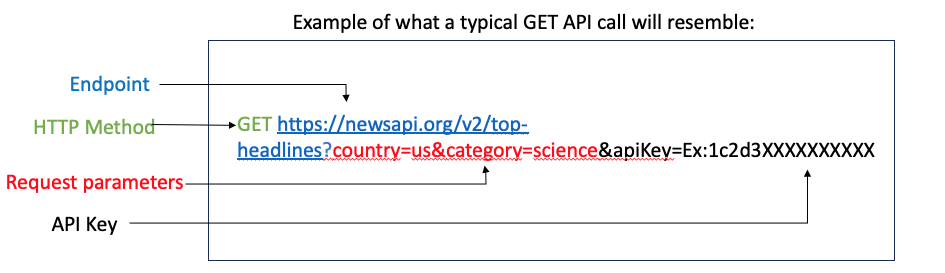


<!--  -->

## Last.fm Music Discovery API

The Last.fm API allows anyone to build their own programs using Last.fm data

- https://www.last.fm/api


In [53]:
#this is a key
aKey = "815f527f75d594aa272fc6c9205136b2"

#the api root information is found here - https://www.last.fm/api/intro
rootURL = "http://ws.audioscrobbler.com/2.0/"

#write a querey
artistSearchQuery = requests.get(rootURL+"?method=artist.search&artist=eminem&api_key="+
                          aKey+"&format=json").json()

In [57]:
pprint.pprint(artistSearchQuery)

{'results': {'@attr': {'for': 'eminem'},
             'artistmatches': {'artist': [{'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
                                                      'size': 'small'},
                                                     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
                                                      'size': 'medium'},
                                                     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
                                                      'size': 'large'},
                                                     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
                                                      'size': 'extralarge'},
                                                     {'#text': 'https://lastfm.f

In [79]:
#find the top albumn

topAlbumSearchQuery = requests.get(rootURL+"?method=artist.getTopAlbums&artist=eminem&api_key="+
                          aKey+"&format=json").json()

topAlbumSearchQuery

{'topalbums': {'album': [{'name': 'The Eminem Show',
    'playcount': 66987229,
    'mbid': 'af71f60c-a8e8-4774-a2b3-30dbfaa13bd6',
    'url': 'https://www.last.fm/music/Eminem/The+Eminem+Show',
    'artist': {'name': 'Eminem',
     'mbid': 'b95ce3ff-3d05-4e87-9e01-c97b66af13d4',
     'url': 'https://www.last.fm/music/Eminem'},
    'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/74768435b4f70689863aa76f888d62a3.png',
      'size': 'small'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/74768435b4f70689863aa76f888d62a3.png',
      'size': 'medium'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/74768435b4f70689863aa76f888d62a3.png',
      'size': 'large'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/74768435b4f70689863aa76f888d62a3.png',
      'size': 'extralarge'}]},
   {'name': 'Recovery',
    'playcount': 44846260,
    'mbid': 'dddf01df-f9f1-4ba6-b414-5ddf1984fc7f',
    'url': 'https://www.last.fm/music/Eminem/Recovery',
    '

In [87]:
topAlbumSearchQuery['topalbums']['album'][0]['name']

'The Eminem Show'

### Exercise 2

 make a search query for your own favorite artist & their top tracks

In [92]:
topTracksSearchQuery = requests.get(rootURL+"?method=artist.getTopTracks&artist=GreenDay&api_key="+
                          aKey+"&format=json").json()

topTracksSearchQuery

{'toptracks': {'track': [{'name': 'Basket Case',
    'playcount': '17724920',
    'listeners': '2146947',
    'mbid': '1c398e28-a63d-4c25-813b-ef9a96aadacb',
    'url': 'https://www.last.fm/music/Green+Day/_/Basket+Case',
    'streamable': '0',
    'artist': {'name': 'Green Day',
     'mbid': '084308bd-1654-436f-ba03-df6697104e19',
     'url': 'https://www.last.fm/music/Green+Day'},
    'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'small'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'medium'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'large'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'extralarge'}],
    '@attr': {'rank': '1'}},
   {'name': 'American Idiot',
    'playcount': '18189278',
    'listeners': '210

In [118]:
#print top 5
#topTracksSearchQuery['toptracks']['track'][0]['name']
top5Tracks = []

for track in topTracksSearchQuery['toptracks']['track']:
        top5Tracks.append(track['name'])

print(top5Tracks[0:5])


['Basket Case', 'American Idiot', 'Boulevard of Broken Dreams', 'Wake Me Up When September Ends', 'Good Riddance (Time of Your Life)']


## National Park Service API

https://www.nps.gov/subjects/developer/index.htm

In [121]:
# authentication
#https://www.nps.gov/subjects/developer/guides.html

# set base url and authenticatoin
apiKey = "lLqHaJEKm2wfhbVIZVVSPrUxkBxWKbDj0GcgplEk"

# request call
baseURL = "https://developer.nps.gov/api/v1"
HEADERS = {"X-Api-Key":apiKey}
req = requests.get(baseURL+"/campgrounds",headers=HEADERS).json()

In [123]:
req

{'total': '661',
 'limit': '50',
 'start': '0',
 'data': [{'id': 'EA81BC45-C361-437F-89B8-5C89FB0D0F86',
   'url': 'https://www.nps.gov/amis/planyourvisit/277-north-campground.htm',
   'name': '277 North Campground',
   'parkCode': 'amis',
   'description': '277 North Campground is generally open year-round and rarely fills up. A boat launch ramp off the campground may be available depending on lake levels. 277 North offers 17 primitive sites, which are first-come, first-served only. Each site has a covered picnic table and a BBQ grill. A group site is available with reservation only. No ground fires are allowed. The sites are suitable for tents or RVs. Vault toilets are available. No drinking water or hookups are available.',
   'latitude': '29.512373695509215',
   'longitude': '-100.90816633365614',
   'latLong': '{lat:29.512373695509215, lng:-100.90816633365614}',
   'audioDescription': '277 North Campground is generally open year-round and rarely fills up. A boat launch ramp off th

In [125]:
# park code amis

baseURL = "https://developer.nps.gov/api/v1"
HEADERS = {"X-Api-Key":apiKey}
req = requests.get(baseURL+"/parks",headers=HEADERS).json()

In [149]:
# pprint.pprint(req)

#req['data'][3]['parkCode']

#len(req['data'])


#iterate through first hald of the parks
for i in range(25):
    #checking each park for its park code
    if req['data'][i]['parkCode'] == "amis":
        print(i)
        
        #print all of the data for that park if its park code is "amis"
        print(req['data'][i])

15
{'id': '34CB30BA-8A5F-4563-AA34-6633708DD9DC', 'url': 'https://www.nps.gov/amis/index.htm', 'fullName': 'Amistad National Recreation Area', 'parkCode': 'amis', 'description': 'An oasis in the desert, Amistad National Recreation Area consists of the US portion of the International Amistad Reservoir. Amistad, a Spanish word meaning "friendship," is known for excellent water-based recreation, camping, hiking, and rich cultural history dating back nearly 5,000 years. Amistad is also home to a wide variety of plant and animal life both above and below the water.', 'latitude': '29.53539777', 'longitude': '-101.075821', 'latLong': 'lat:29.53539777, long:-101.075821', 'activities': [{'id': '071BA73C-1D3C-46D4-A53C-00D5602F7F0E', 'name': 'Boating'}, {'id': 'E0E4CE55-3119-46DE-86EB-6817CD8D5F30', 'name': 'Motorized Boating'}, {'id': '7503433C-3856-4E82-AFF3-0B1649766ED3', 'name': 'Jet Skiing'}, {'id': 'A59947B7-3376-49B4-AD02-C0423E08C5F7', 'name': 'Camping'}, {'id': '4A58AF13-E8FB-4530-B41A-

In [157]:
# make a list of all activiies you can do in the park
# req['data'][15]['parkCode']

for activity in req['data'][15]['activities']:
    print(activity['name'])


Boating
Motorized Boating
Jet Skiing
Camping
Backcountry Camping
Canoe or Kayak Camping
Car or Front Country Camping
Group Camping
RV Camping
Fishing
Freshwater Fishing
Hiking
Front-Country Hiking
Hunting and Gathering
Hunting
Paddling
Canoeing
Kayaking
Junior Ranger Program
SCUBA Diving
Swimming
Freshwater Swimming
Water Skiing
Wildlife Watching
Birdwatching
Park Film
Shopping
Bookstore and Park Store


## Making Functions

## Wikipedia API

In [159]:
## Run this cell block
baseURL = "https://en.wikipedia.org/w/api.php" #base URL for the wikipedia API

In [161]:
search = 'microsoft' #the parameter we'll search for

testRequest = requests.get(baseURL+"?+action=query&list=search&srsearch="+search+"&format=json").json() #our json request

In [163]:
testRequest

{'batchcomplete': '',
 'continue': {'sroffset': 10, 'continue': '-||'},
 'query': {'searchinfo': {'totalhits': 43601},
  'search': [{'ns': 0,
    'title': 'Microsoft',
    'pageid': 19001,
    'size': 229016,
    'wordcount': 19729,
    'snippet': '<span class="searchmatch">Microsoft</span> Corporation is an American multinational corporation and technology conglomerate headquartered in Redmond, Washington. Founded in 1975, the',
    'timestamp': '2025-06-24T00:25:20Z'},
   {'ns': 0,
    'title': 'Microsoft Office',
    'pageid': 20288,
    'size': 198060,
    'wordcount': 16053,
    'snippet': 'Bill Gates on August 1, 1988, at COMDEX, contained <span class="searchmatch">Microsoft</span> Word, <span class="searchmatch">Microsoft</span> Excel, and <span class="searchmatch">Microsoft</span> PowerPoint — all three of which remain core products',
    'timestamp': '2025-05-05T23:14:26Z'},
   {'ns': 0,
    'title': 'Microsoft Excel',
    'pageid': 20268,
    'size': 103566,
    'wordcount': 

In [165]:
# define a function

def WikiCall(search):
    

  #define the baseURL
    baseURL = "https://en.wikipedia.org/w/api.php" #base URL for the wikipedia API
  #make a query
    Q = requests.get(baseURL+"?+action=query&list=search&srsearch="+search+"&format=json").json() #our json request

    return Q

In [167]:
WikiCall("Microsoft")

{'batchcomplete': '',
 'continue': {'sroffset': 10, 'continue': '-||'},
 'query': {'searchinfo': {'totalhits': 43602},
  'search': [{'ns': 0,
    'title': 'Microsoft',
    'pageid': 19001,
    'size': 229016,
    'wordcount': 19729,
    'snippet': '<span class="searchmatch">Microsoft</span> Corporation is an American multinational corporation and technology conglomerate headquartered in Redmond, Washington. Founded in 1975, the',
    'timestamp': '2025-06-24T00:25:20Z'},
   {'ns': 0,
    'title': 'Microsoft Excel',
    'pageid': 20268,
    'size': 103566,
    'wordcount': 9663,
    'snippet': '<span class="searchmatch">Microsoft</span> Excel is a spreadsheet editor developed by <span class="searchmatch">Microsoft</span> for Windows, macOS, Android, iOS and iPadOS. It features calculation or computation capabilities',
    'timestamp': '2025-06-17T06:47:53Z'},
   {'ns': 0,
    'title': 'Microsoft Office',
    'pageid': 20288,
    'size': 198060,
    'wordcount': 16053,
    'snippet': 'Bi

### Exercise 3: 

call the same API and pass another variable as a search term

In [169]:
WikiCall("Dog")

{'batchcomplete': '',
 'continue': {'sroffset': 10, 'continue': '-||'},
 'query': {'searchinfo': {'totalhits': 124204,
   'suggestion': 'do',
   'suggestionsnippet': 'do'},
  'search': [{'ns': 0,
    'title': 'Dog',
    'pageid': 4269567,
    'size': 192447,
    'wordcount': 17696,
    'snippet': 'The <span class="searchmatch">dog</span> (Canis familiaris or Canis lupus familiaris) is a domesticated descendant of the gray wolf. Also called the domestic <span class="searchmatch">dog</span>, it was selectively bred',
    'timestamp': '2025-06-21T22:30:22Z'},
   {'ns': 0,
    'title': 'Dog (disambiguation)',
    'pageid': 2854454,
    'size': 7831,
    'wordcount': 1059,
    'snippet': 'Look up <span class="searchmatch">dog</span>, doggy, or doggie in Wiktionary, the free dictionary. The <span class="searchmatch">dog</span> is a domesticated canid species, Canis familiaris. <span class="searchmatch">Dog</span>(s), doggy, or doggie may',
    'timestamp': '2025-03-16T12:09:44Z'},
   {'ns': 

### Exercise 4: 
Create a function that searches for articles like in the previous two questions, but this time return the article with the highest word count. This should return the title, pageid, snippet and wordcount from the article with the highest word count from your search.

In [187]:
def WikiCall_highestWordCount(search):
    wordCount = 0

    
    search = "dog"

    baseURL = "https://en.wikipedia.org/w/api.php"

    Q = requests.get(baseURL+"?+action=query&list=search&srsearch="+search+"&format=json").json()

    #print(Q['query']['search']) # this is a list of articles

    for article in Q['query']['search']:
        wordCount = article['wordcount']

        title = article['title']
        pageid = article['pageid']
        snippet = article['snippet']


        print(title)
        print(wordCount)
        

In [189]:
WikiCall_highestWordCount("dog")

Dog
17696
Dog (disambiguation)
1059
Dog Eat Dog
388
The Dog
282
That Dog
1322
The Farmer's Dog
469
Duane Chapman
5108
Hot dog
5174
Black dog
558
Dog Man (film)
2877
